In [1]:
# 減少variable數量
# 資料集 dataframe格式可用 df1[data_in] //df1[data_out]調用
# train, test為從'數據處理過的df1'拆分
# EDA : parallel coordinates


In [2]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.style.use('bmh')
df_temp = pd.read_csv("dataframe\HVTNZN_HTE_Features_pymagen_2.csv")
df_temp.head()
print(df_temp.columns)

save_dir = './save_Figs_feat'
os.makedirs(save_dir, exist_ok=True)


Index(['formula', 'frac_N', 'frac_O', 'frac_Ti', 'frac_V', 'frac_Zr',
       'frac_Nb', 'frac_Hf', 'mendeleev_no', 'electrical_resistivity',
       'velocity_of_sound', 'reflectivity', 'poissons_ratio', 'molar_volume',
       'thermal_conductivity', 'boiling_point', 'melting_point',
       'critical_temperature', 'superconduction_temperature', 'liquid_range',
       'bulk_modulus', 'youngs_modulus', 'brinell_hardness',
       'rigidity_modulus', 'vickers_hardness', 'density_of_solid',
       'atomic_radius_calculated', 'van_der_waals_radius',
       'coefficient_of_linear_thermal_expansion', 'enthalpy', 'entropy',
       'delta', 'Tm', 'x_e', 'x_ch', 'potential_energy', 'deltaG', 'omega',
       'VEC', 'YM(GPa)', 'H(GPa)'],
      dtype='object')


In [13]:
in_feature = df_temp.columns
in_feature = ['frac_N', 'frac_O', 'frac_Ti', 'frac_V', 'frac_Zr',
       'frac_Nb', 'frac_Hf', 
       # 'mendeleev_no', 'electrical_resistivity',
       # 'velocity_of_sound', 'reflectivity', 'poissons_ratio', 'molar_volume',
       # 'thermal_conductivity', 'boiling_point',
       # 'critical_temperature', 'superconduction_temperature', 'liquid_range',
       # 'bulk_modulus', 'youngs_modulus', 'brinell_hardness',
       # 'rigidity_modulus', 'vickers_hardness', 'density_of_solid',
       # 'atomic_radius_calculated', 'van_der_waals_radius',
       # 'coefficient_of_linear_thermal_expansion', 'enthalpy', 'entropy',
       # 'delta', 'Tm', 'x_e', 'x_ch', 'potential_energy', 'deltaG', 'omega', 'VEC',
       'YM(GPa)', 'H(GPa)']

Target_property = ['YM(GPa)', 'H(GPa)']

selected_features = [col for col in df_temp.columns if col in in_feature]
df_x_selected = df_temp[selected_features] if selected_features else pd.DataFrame()
print('選擇的特徵欄位:', selected_features)
df_x_selected.describe()  
display(df_x_selected)  

# df=df_x_selected.dropna()
# print(df.isnull().sum())


選擇的特徵欄位: ['frac_N', 'frac_O', 'frac_Ti', 'frac_V', 'frac_Zr', 'frac_Nb', 'frac_Hf', 'YM(GPa)', 'H(GPa)']


frac_N    frac_O   frac_Ti    frac_V   frac_Zr   frac_Nb   frac_Hf  \
0    0.482748  0.000000  0.235724  0.029703  0.178318  0.041004  0.032503   
1    0.457800  0.010400  0.236000  0.030700  0.181600  0.045800  0.037700   
2    0.470100  0.000000  0.227900  0.029700  0.177500  0.053100  0.041700   
3    0.464700  0.000000  0.222500  0.030800  0.176800  0.059500  0.045700   
4    0.473300  0.013900  0.204200  0.026600  0.169100  0.064100  0.048800   
..        ...       ...       ...       ...       ...       ...       ...   
391  0.441456  0.014199  0.050595  0.078992  0.037496  0.036596  0.340666   
392  0.457000  0.009800  0.045700  0.070200  0.035000  0.039000  0.343300   
393  0.448200  0.013800  0.047000  0.088100  0.037700  0.032000  0.333200   
394  0.434500  0.016600  0.044800  0.083700  0.034600  0.033100  0.352700   
395  0.433700  0.017200  0.042700  0.071800  0.033300  0.033200  0.368100   

        YM(GPa)  H(GPa)  
0    317.132720   33.11  
1    331.546618   33.64  
2    339.685955   37.14  
3    361.708148   27.63  
4    395.137130   33.39  
..          ...     ...  
391  279.993196   29.75  
392  300.289064   25.85  
393  282.022668   27.27  
394  292.292314   27.27  
395  287.138121   26.92  

[396 rows x 9 columns]

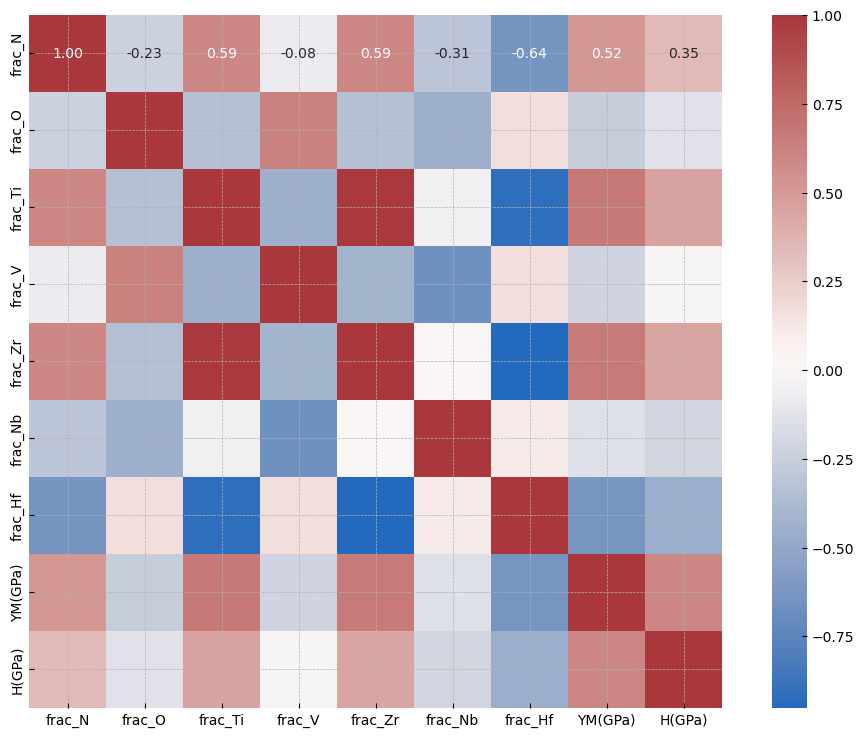

In [4]:
# plt.figure(figsize=(13, 9))

# df = df_x_selected.dropna()

# corrmat = df.corr() 
# hm = sns.heatmap(corrmat, 
#                  cbar= True , 
#                  annot= True , 
#                  square= True , 
#                  fmt= '.2f' , 
#                  yticklabels=df.columns, 
#                  xticklabels=df.columns, 
#                  cmap= "vlag" ) 
# fig_path = os.path.join(save_dir,'pearson.png') 
# plt.savefig(fig_path, bbox_inches='tight', dpi=300)
# plt.show()
# plt.close()



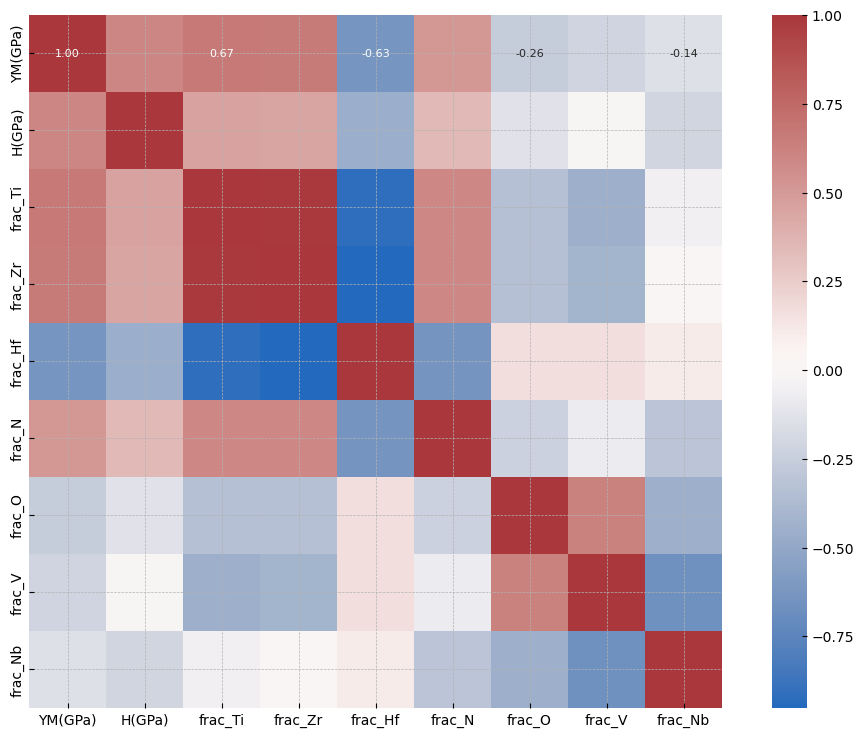

In [5]:
# 計算每個欄位與多個 target property 的最大相關性
corr_with_targets = {}
for col in df.columns:
    if col not in Target_property:
        corrs = [abs(df[col].corr(df[target])) for target in Target_property]
        corr_with_targets[col] = max(corrs)
    else:
        corr_with_targets[col] = 1.0  # 目標本身設最大


# 依最大相關性排序欄位
sorted_cols = sorted(corr_with_targets, key=lambda x: corr_with_targets[x], reverse=True)
df_sorted = df[sorted_cols]

# 計算相關矩陣
corrmat = df_sorted.corr().values
mask = np.full(corrmat.shape, '', dtype=object)

# 每兩格顯示一次數值
for i in range(corrmat.shape[0]):
    for j in range(corrmat.shape[1]):
        if i % 2 == 0 and j % 2 == 0:
            mask[i, j] = f'{corrmat[i, j]:.2f}'

plt.figure(figsize=(13, 9))
hm = sns.heatmap(df_sorted.corr(), cbar=True, annot=mask, square=True, fmt='', annot_kws={'size':8},
                 yticklabels=df_sorted.columns, xticklabels=df_sorted.columns, cmap='vlag')
# plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
fig_path = os.path.join(save_dir, 'pearson_sorted_multi_target.png')
plt.savefig(fig_path, bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [ ]:
# 計算每個欄位與多個 target property 的最大相關性
filter_thred = 0.3
corr_with_targets = {}
for col in df.columns:
    if col not in Target_property:
        corrs = [abs(df[col].corr(df[target])) for target in Target_property]
        corr_with_targets[col] = max(corrs)
    else:
        corr_with_targets[col] = 1.0  # 目標本身設最大

# 依最大相關性過濾特徵
filtered_cols = [col for col in corr_with_targets if corr_with_targets[col] >= filter_thred]
print('原欄位數:', len(df.columns), '保留的欄位數:', len(filtered_cols))
print('保留的欄位:', filtered_cols,)
# 顯示每個保留欄位及其最大相關性
for col in filtered_cols:
    print(f"{col}: {corr_with_targets[col]:.3f}")



###### 繪製filtered cols的相關矩陣
# # 依最大相關性排序欄位
# sorted_cols = sorted(filtered_cols, key=lambda x: corr_with_targets[x], reverse=True)
# df_sorted = df[sorted_cols]

# # 計算相關矩陣
# corrmat = df_sorted.corr().values
# mask = np.full(corrmat.shape, '', dtype=object)

# # 每兩格顯示一次數值
# for i in range(corrmat.shape[0]):
#     for j in range(corrmat.shape[1]):
#         if i % 2 == 0 and j % 2 == 0:
#             mask[i, j] = f'{corrmat[i, j]:.2f}'

# plt.figure(figsize=(13, 9))
# hm = sns.heatmap(df_sorted.corr(), cbar=True, annot=mask, square=True, fmt='', annot_kws={'size':12},
#                  yticklabels=df_sorted.columns, xticklabels=df_sorted.columns, cmap='vlag')
# # plt.xticks(rotation=45, fontsize=10)
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=12)

# fig_path = os.path.join(save_dir, 'pearson_sorted_multi_target_filtered_sparse_annot.png')
# plt.savefig(fig_path, bbox_inches='tight', dpi=300)
# plt.show()
# plt.close()

原欄位數: 9 保留的欄位數: 6
保留的欄位: ['frac_N', 'frac_Ti', 'frac_Zr', 'frac_Hf', 'YM(GPa)', 'H(GPa)']
frac_N: 0.516
frac_Ti: 0.668
frac_Zr: 0.660
frac_Hf: 0.634
YM(GPa): 1.000
H(GPa): 1.000


c:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\m9230\anaco

<Figure size 500x500 with 0 Axes>

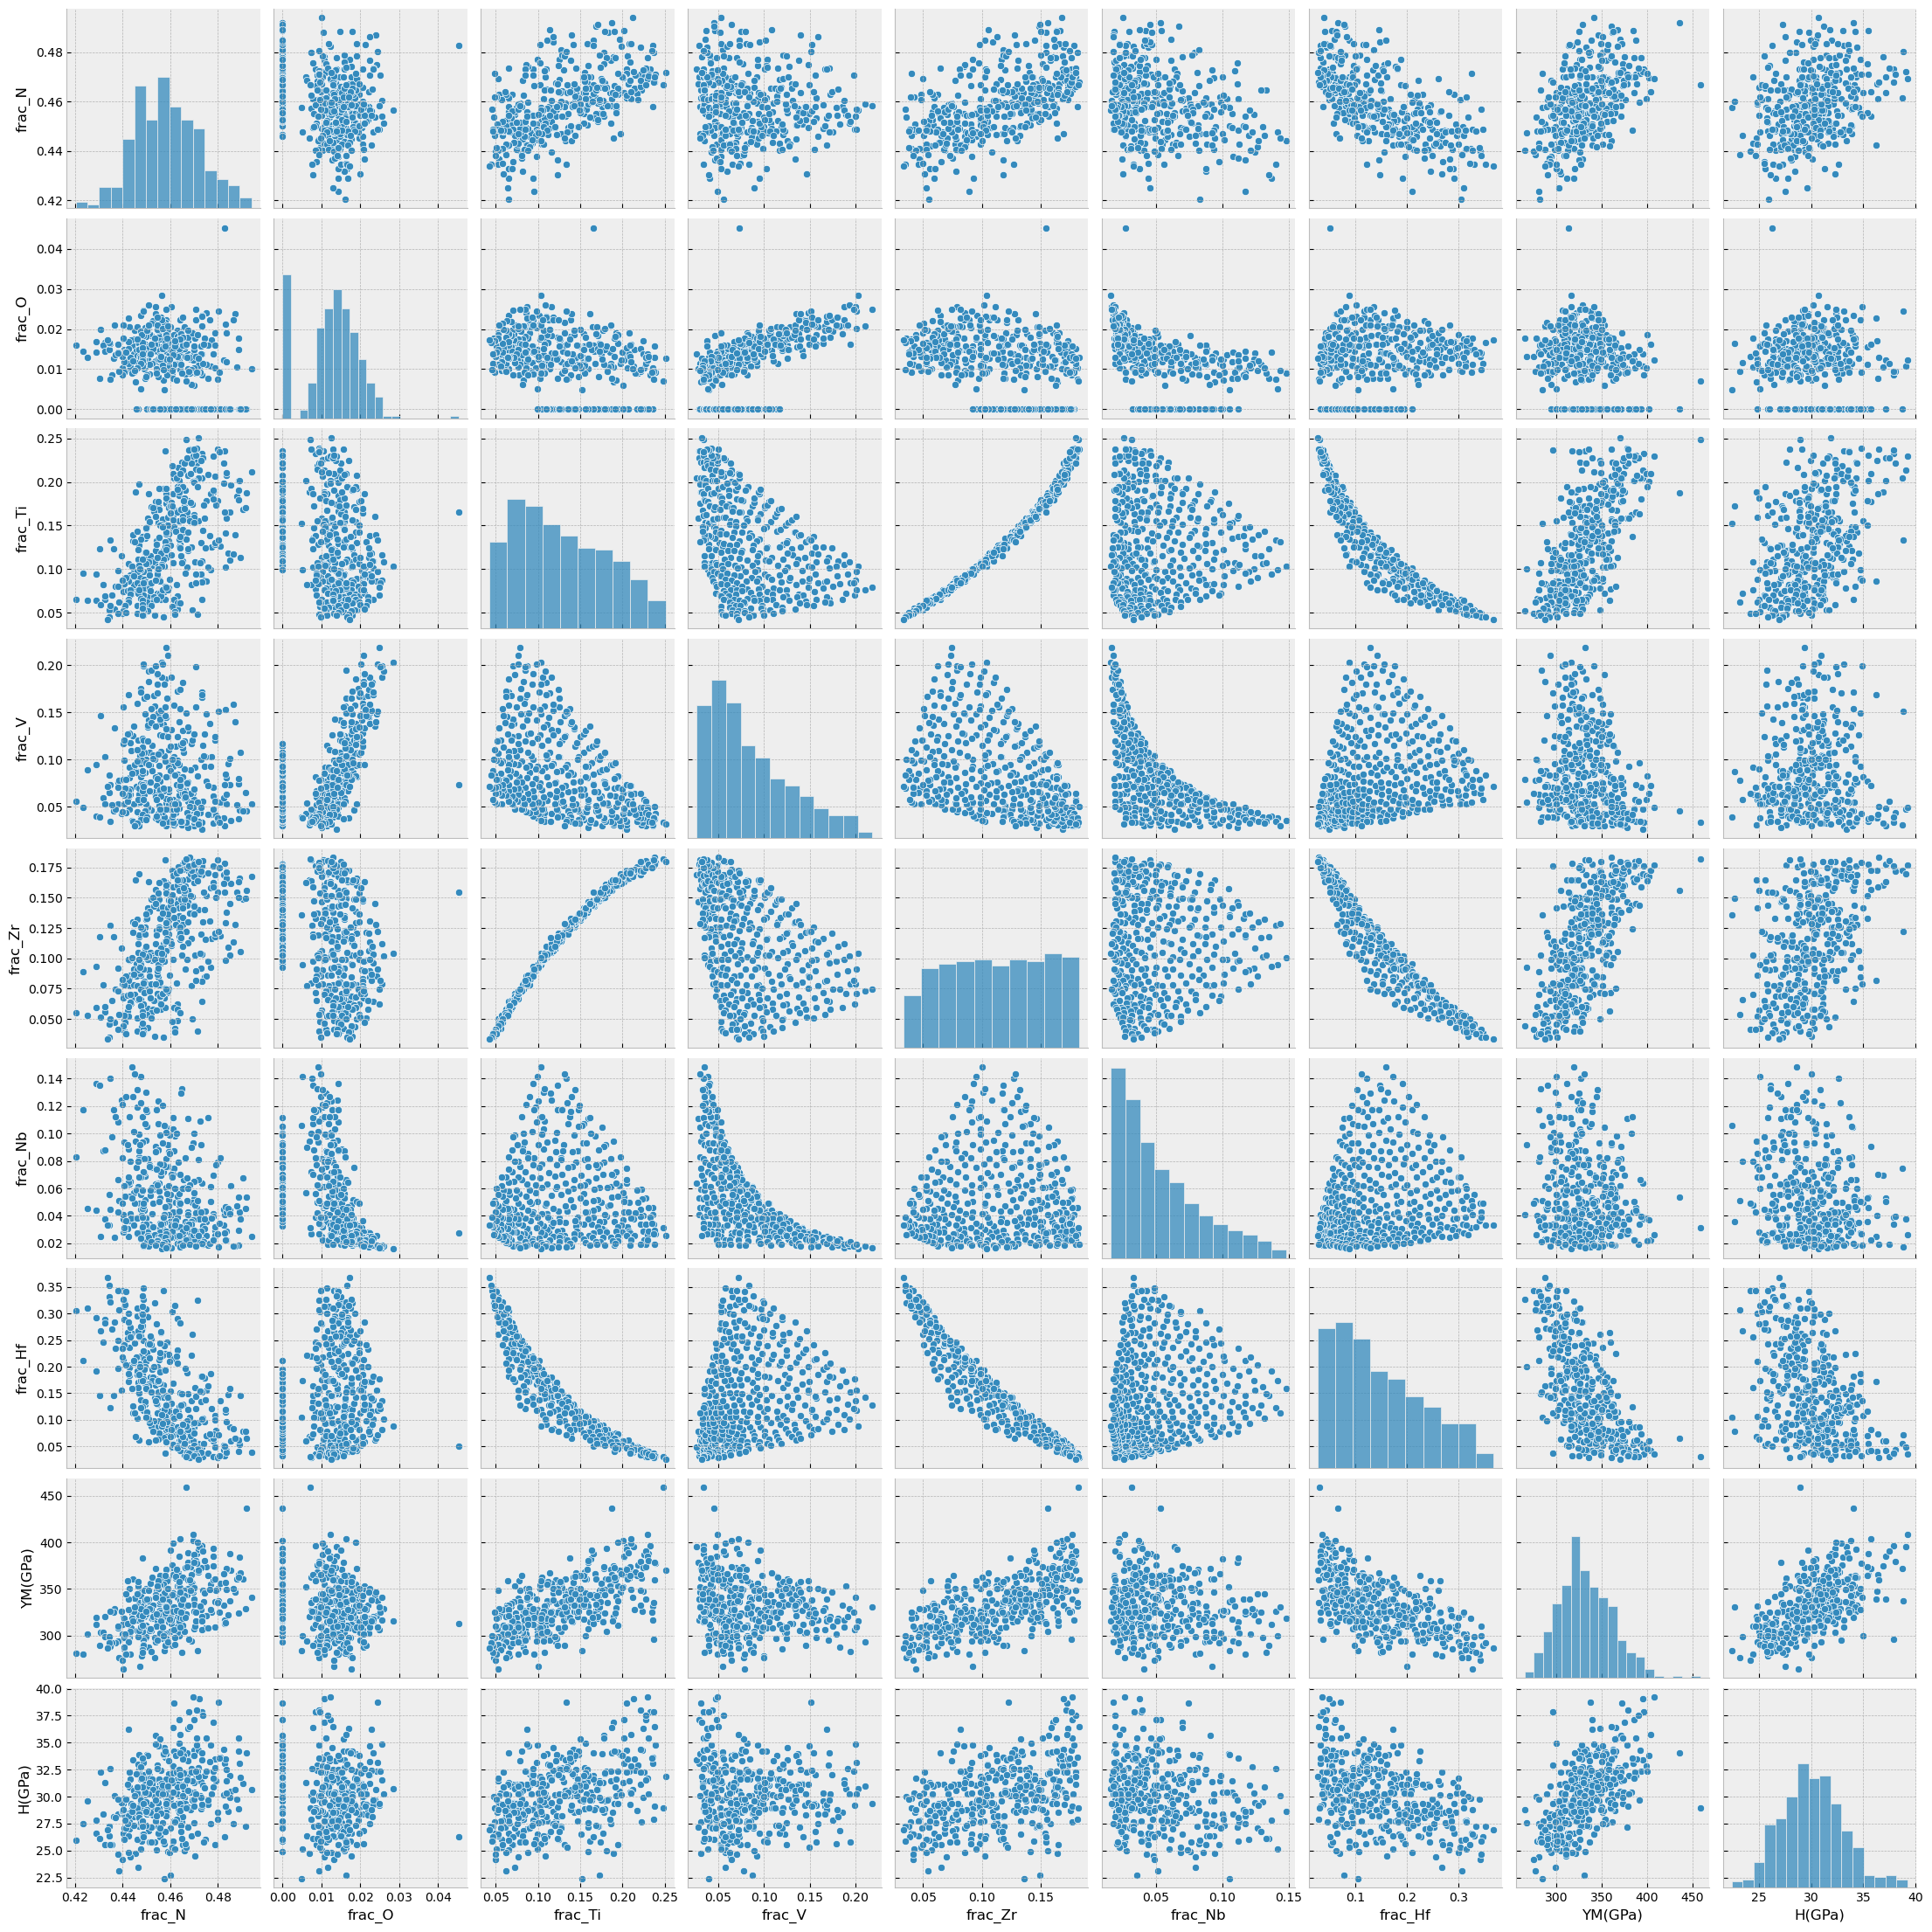

In [7]:
plt.figure(figsize=(5, 5));
sns.pairplot(df,palette='vlag')
fig_path = os.path.join(save_dir, 'intercorrelation.png')
plt.savefig(fig_path, bbox_inches='tight', dpi=300)
plt.show()
plt.close()

C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col].values, y=data[i].values, palette="vlag", s=80)
C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col].values, y=data[i].values, palette="vlag", s=80)
C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col].values, y=data[i].values, palette="vlag", s=80)
C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col].values, y=data[i].values, palette="vlag", s=80)
C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `h

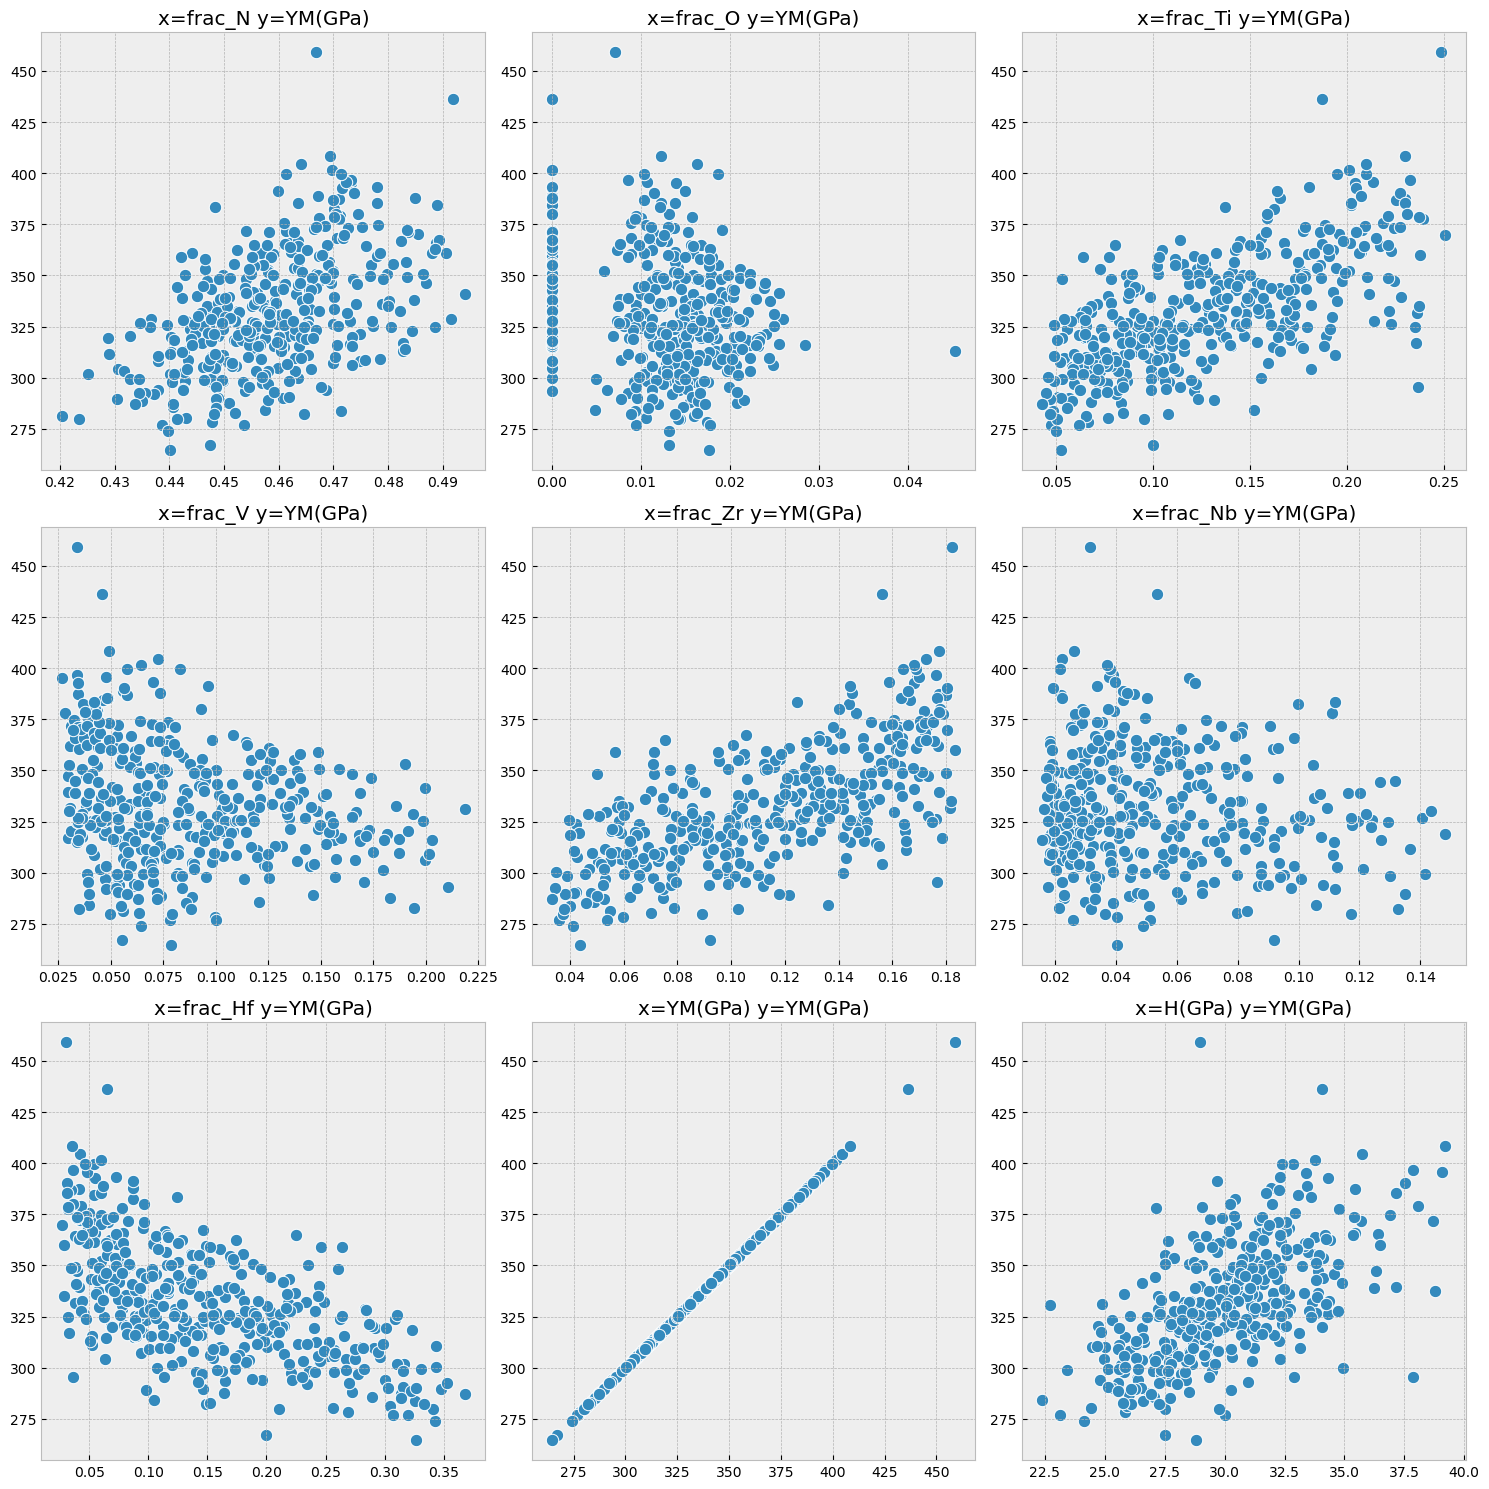

C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col].values, y=data[i].values, palette="vlag", s=80)
C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col].values, y=data[i].values, palette="vlag", s=80)
C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col].values, y=data[i].values, palette="vlag", s=80)
C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col].values, y=data[i].values, palette="vlag", s=80)
C:\Users\m9230\AppData\Local\Temp\ipykernel_60788\890025058.py:13: UserWarning: Ignoring `palette` because no `h

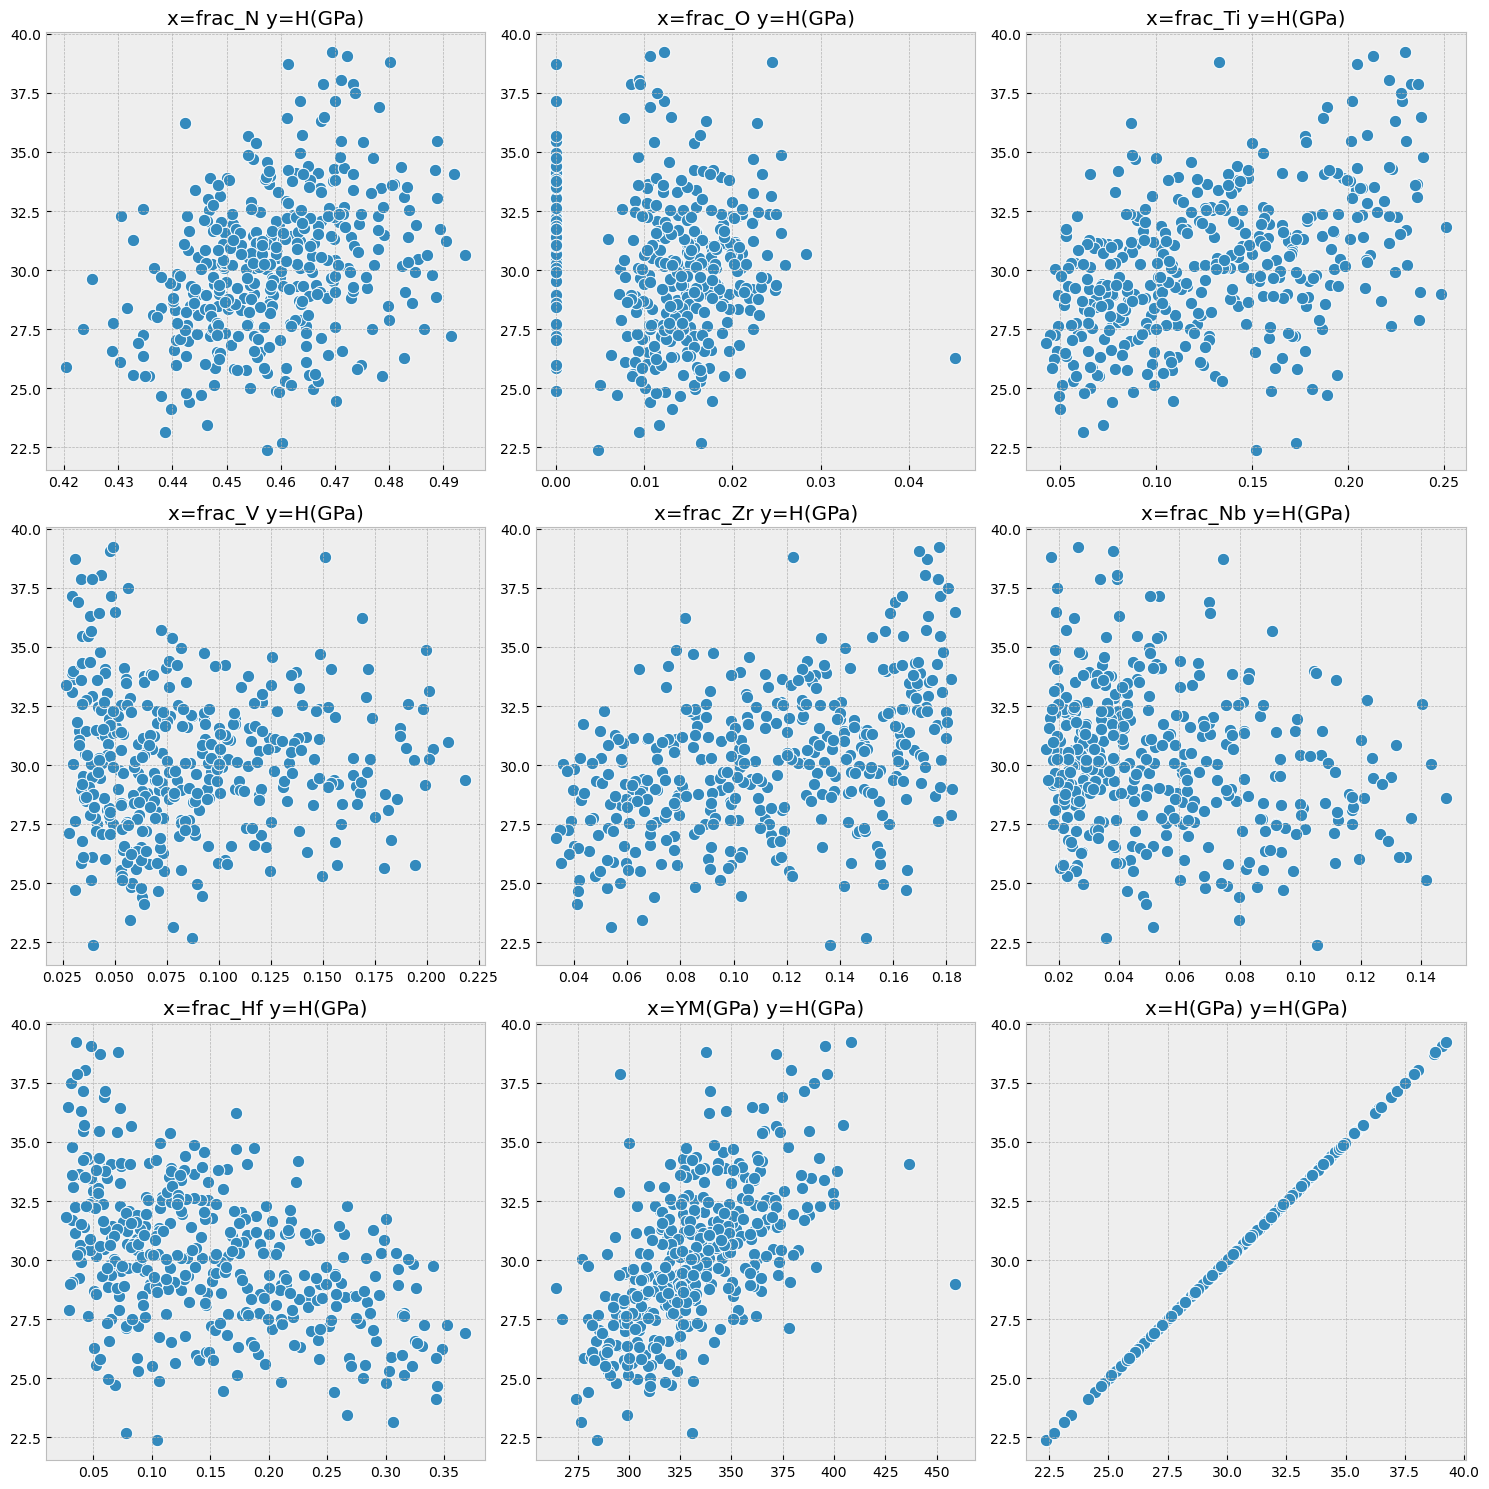

In [8]:
#feature=['I_on']
import math

def scatter_plot(data, feature):
    for i in feature:
        num_cols = len(data.columns)
        ncols = 3  # 每行顯示3張圖
        nrows = math.ceil(num_cols / ncols)
        plt.figure(figsize=(5 * ncols, 5 * nrows))
        for idx, col in enumerate(data.columns.values.tolist()):
            plt.subplot(nrows, ncols, idx + 1)
            plt.title(f"x={col} y={i}")
            sns.scatterplot(x=data[col].values, y=data[i].values, palette="vlag", s=80)
        plt.tight_layout()
        fig_path = os.path.join(save_dir,f'scatter_{i}.png') 
        plt.savefig(fig_path, bbox_inches='tight', dpi=300)
        plt.show()
        plt.close()    
scatter_plot(df,Target_property)

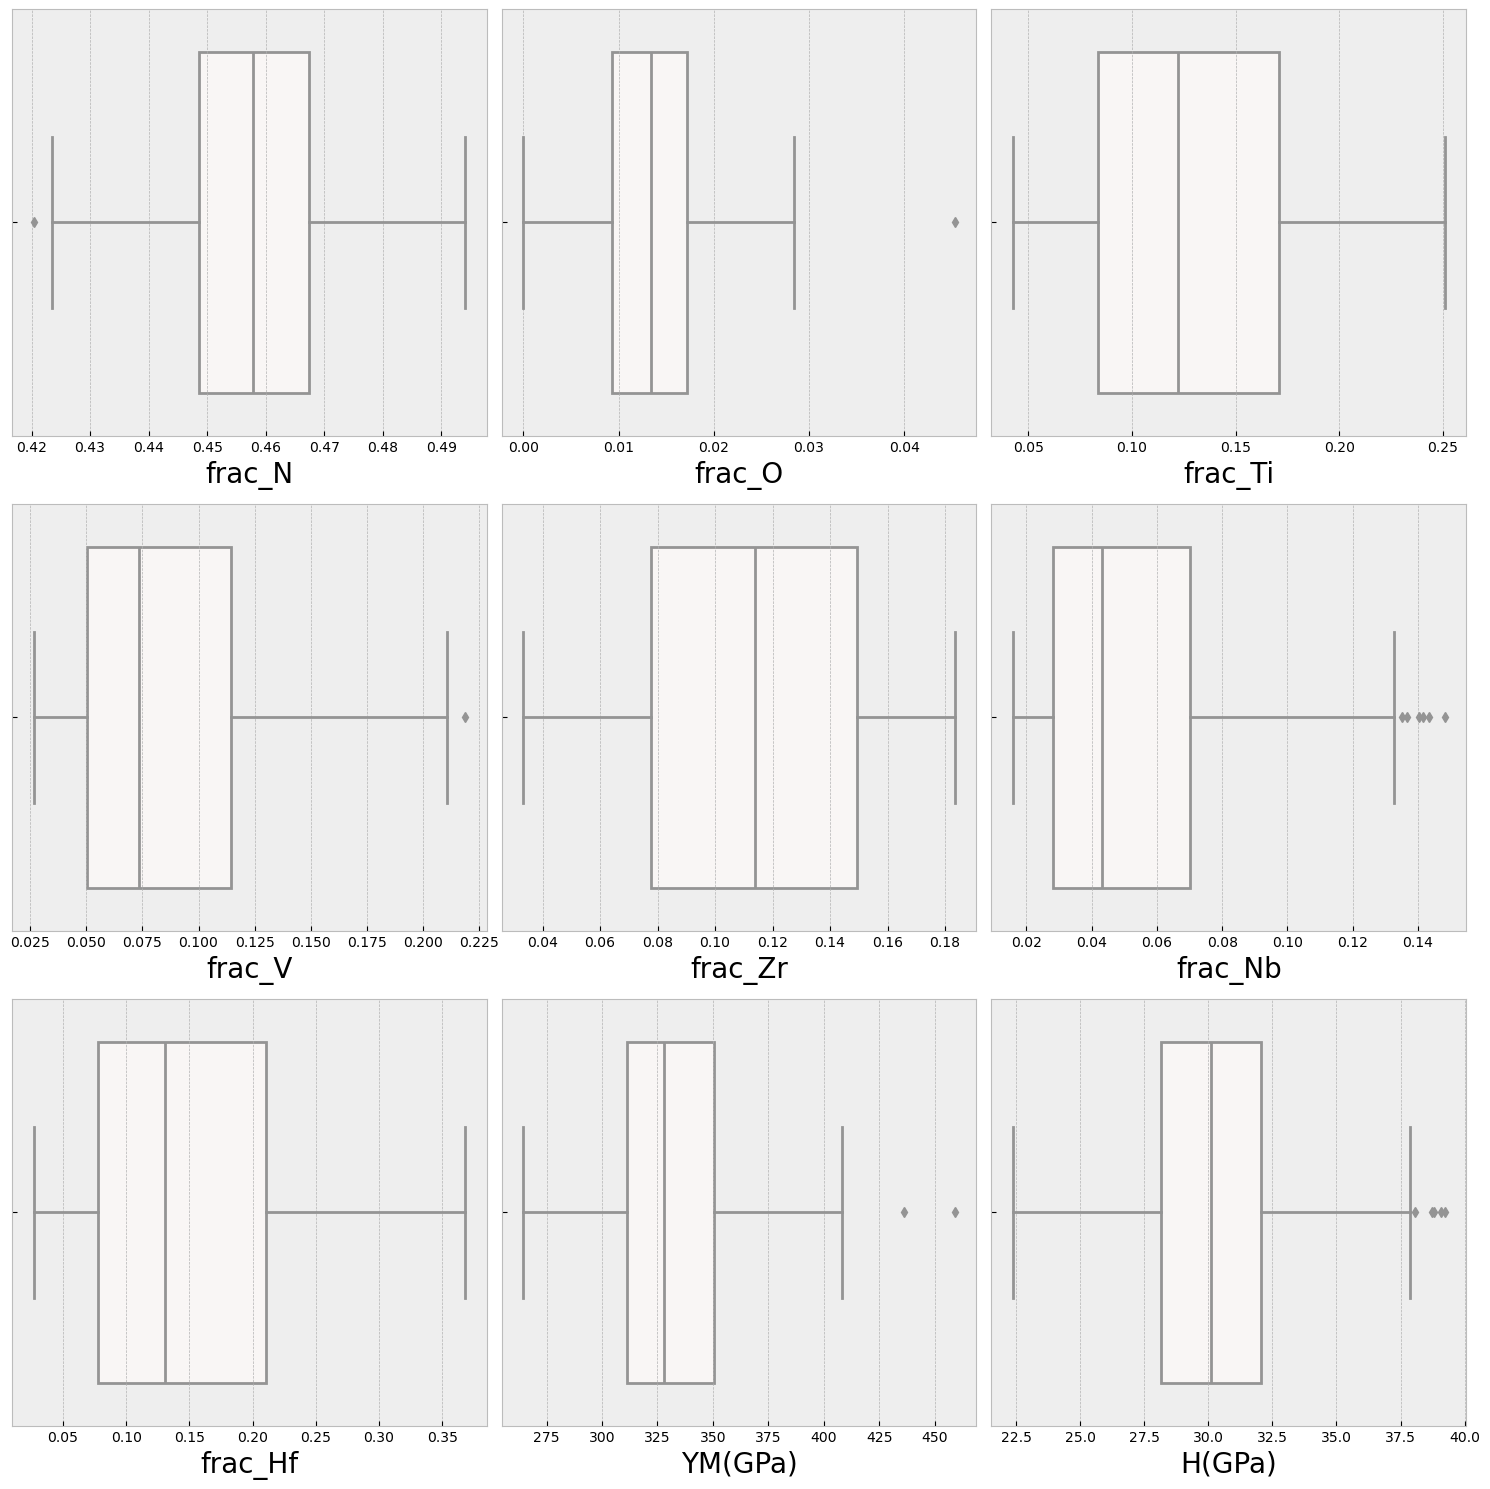

In [9]:
import math
num_cols = len(df.columns)
ncols = 3
nrows = math.ceil(num_cols / ncols)
plt.figure(figsize=(5 * ncols, 5 * nrows))
for idx, col in enumerate(df.columns.tolist()):
    plt.subplot(nrows, ncols, idx + 1)
    sns.boxplot(x=df[col], palette='vlag')
    plt.xlabel(col, fontsize=20)
plt.tight_layout()
fig_path = os.path.join(save_dir,f'data_distribution_1.png') 
plt.savefig(fig_path, bbox_inches='tight', dpi=300)
plt.show()
plt.close() 

c:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

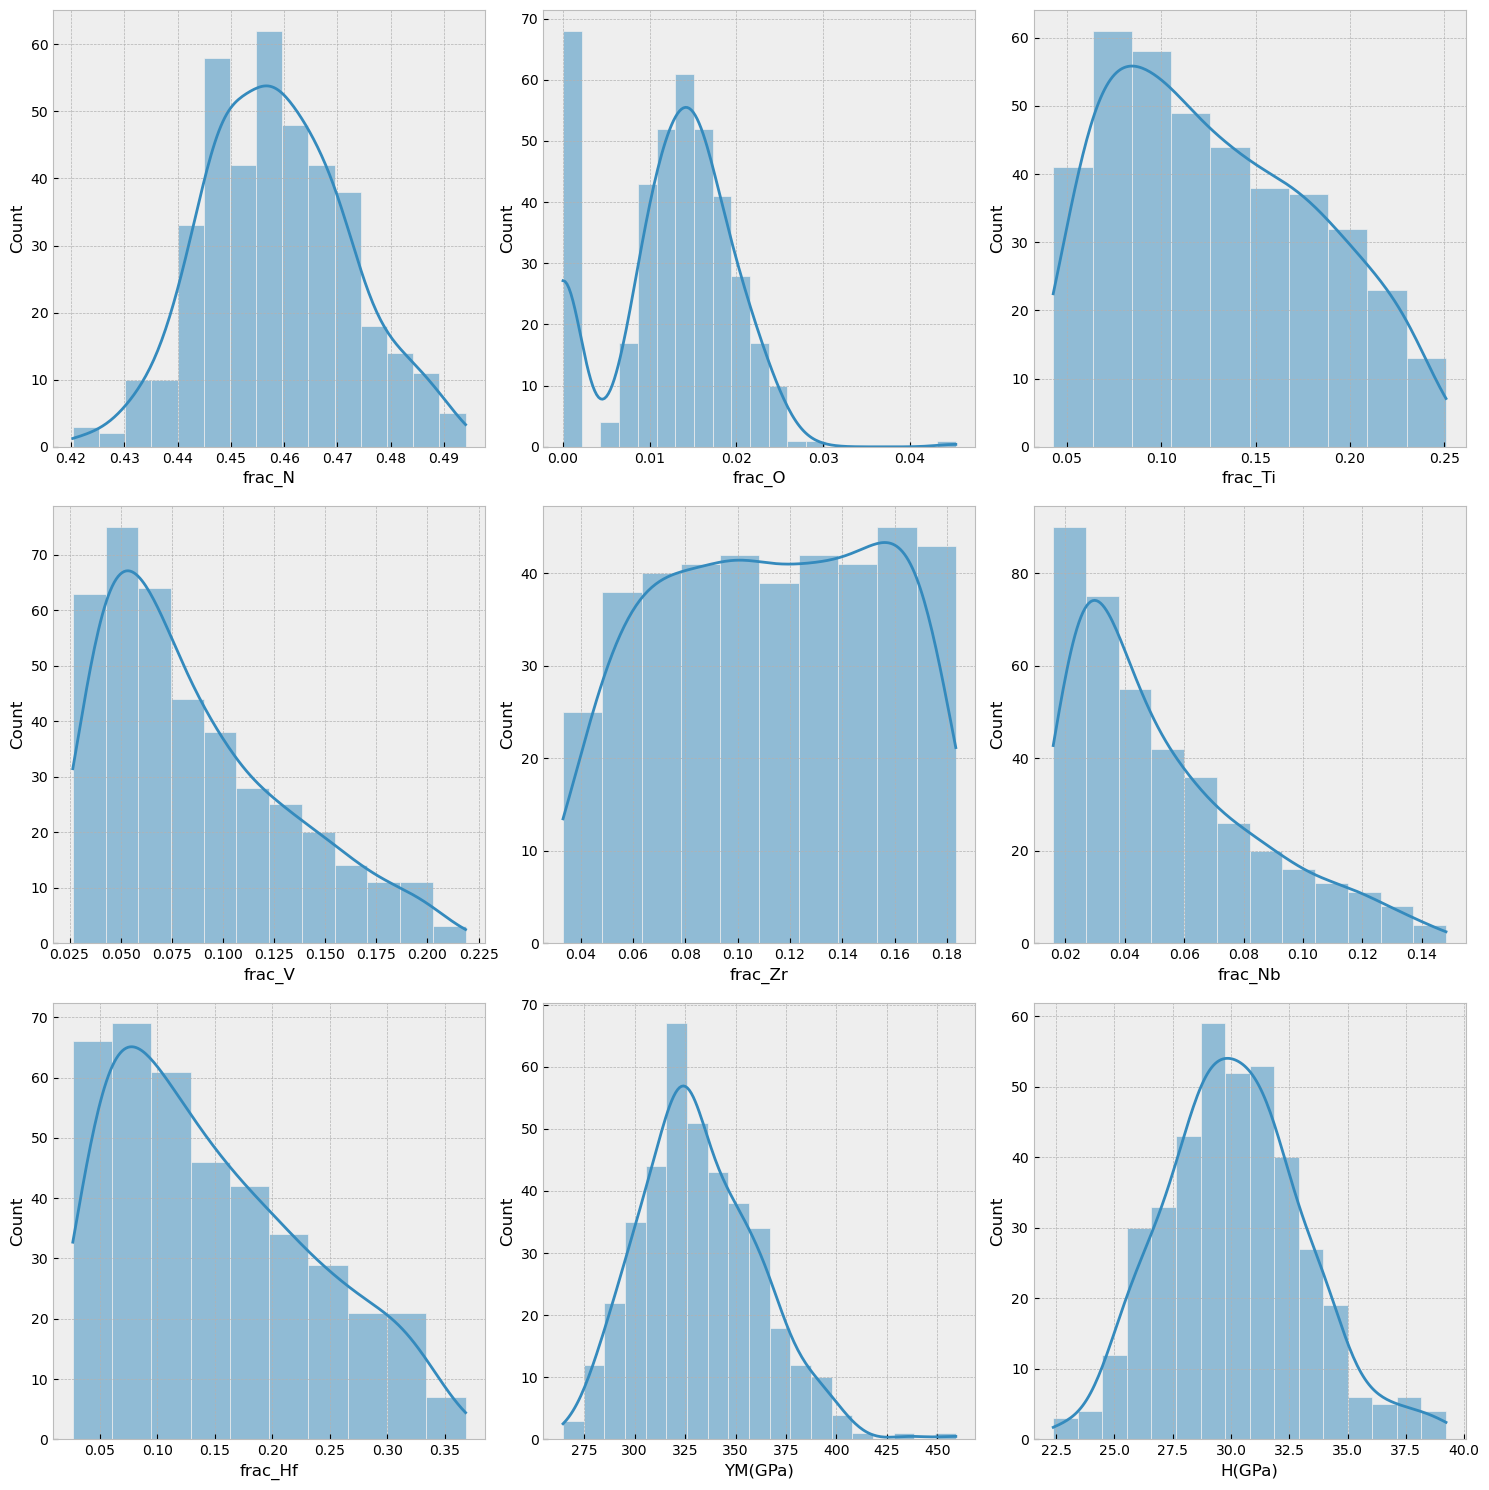

In [10]:
import math
def plot_distribution_curves(data, save_dir='./save_Figs'):
    num_cols = len(data.columns)
    ncols = 3
    nrows = math.ceil(num_cols / ncols)
    plt.figure(figsize=(5 * ncols, 5 * nrows))
    for idx, col in enumerate(data.columns.values.tolist()):
        plt.subplot(nrows, ncols, idx + 1)
        sns.histplot(data[col].values, kde=True)
        plt.xlabel(col)
    plt.tight_layout()
    fig_path = os.path.join(save_dir, 'data_distribution_2.png')
    plt.savefig(fig_path, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()




plot_distribution_curves(df)

In [ ]:
import plotly.express as px
import os

def parallel_coordinate(data, data_out, save_dir='./save_Figs'):
    print('output: {:}'.format(data_out))
    # 將 data_out 欄位移到最後
    cols = [col for col in data.columns if col not in data_out] + list(data_out)
    data = data[cols]
    os.makedirs(save_dir, exist_ok=True)
    for i in data_out:
        result = {key: value for key, value in zip(data.columns.values.tolist(), data.columns.values.tolist())}
        fig = px.parallel_coordinates(data, color=i, labels=result,
                                     color_continuous_scale=px.colors.diverging.Tealrose,
                                     color_continuous_midpoint=data[i].median())
        fig.update_coloraxes(colorbar_thickness=5, colorbar_title_side='right', colorbar_title=f'{i}\n')
        fig.update_layout(xaxis=dict(tickangle=60, tickfont=dict(size=10)),
                      margin=dict(l=40, r=40, t=40, b=40))  # 調整文字大小與邊距
        fig.write_html(os.path.join(save_dir, f'parallel_{i}.html'))
        fig.show()


### ｔｏ　彥妤 :這裡cols_main設計成default 如下面的程式，並讓使用者有選擇欄位的選項
# cols_main: in_feature中不含Target_property的欄位
cols_main = [col for col in in_feature if col not in Target_property]
# cols_last2: Target_property欄位
cols_last2 = list(Target_property)

cols_selected = cols_main + cols_last2
df_selected = df[cols_selected]

#df1 df.columns[7:9].values.tolist()       
parallel_coordinate(df_selected, Target_property)

output: ['YM(GPa)', 'H(GPa)']


c:\Users\m9230\anaconda3\envs\NYCU_py39_2024_02\lib\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [ ]:
# !pip install -U kaleido